
This tutorial demonstrates a simulation and visualization of a well-known problem in magnetohydrodynamics.
The simulation is parallelized using the Camber [`mpi`](https://docs.stage.camber.cloud/docs/python-api/mpi/) package, and it uses the Athena library to execute Athena++ code on Camber's OpenMPI infrastructure.

## Simulate a 2D Orszag-Tang vortex

The following steps create an MPI cluster to compute the [Orszag-Tang Vortex](https://www.astro.princeton.edu/~jstone/Athena/tests/orszag-tang/pagesource.html), a popular demonstration problem in fluid mechanics.
After the output is generated, an imported Python script creates a visualization.

### Spin-Up MPI cluster

The first step is to import Camber and initialize the MPI cluster:




In [1]:
import camber

In [ ]:
# download Athena++ from public repo if not already present in your directory
!git clone https://github.com/PrincetonUniversity/athena.git



Now create an MPI job to compile `Athena++`.
This step ensures the code compiles with the correct MPI environment:



In [3]:
# Now we create an MPI job to compile Athena++. This step ensure the code is compiled with the correct MPI environment
compile_job = camber.mpi.create_job(
    command="cd athena && python configure.py -b --prob=orszag_tang -mpi -hdf5 --hdf5_path=${HDF5_HOME} && make clean && make all -j$(nproc)",
    engine_size="SMALL"
)



Check the `compile_job` output to monitor the [job status](/docs/reference/job-attributes/#status):
                                                           
                                                           

In [7]:

compile_job

CamberJob({"job_id": 6870, "status": "COMPLETED", "engine_size": "SMALL", "engine_type": "MPI", "command": "cd athena && python configure.py -b --prob=orszag_tang -mpi -hdf5 --hdf5_path=${HDF5_HOME} && make clean && make all -j$(nproc)", "with_gpu": false})



Once the job status `RUNNING` or `COMPLETED`, use `read_logs()` to monitor the output:



In [ ]:
compile_job.read_logs(tail_lines=10)



### Run the MPI job

After compilation finishes, use the [`create_job`](/docs/python-api/mpi/#create_job) method to start the Orszag-Tang simulation using the Athena binary and input file:



In [9]:
# run camber with a medium instance
run_job = camber.mpi.create_job(
    command="mpirun -np 16 athena/bin/athena -i athinput.orszag-tang",
    engine_size="MEDIUM"
)

In [16]:
# check job status
run_job

CamberJob({"job_id": 6871, "status": "COMPLETED", "engine_size": "MEDIUM", "engine_type": "MPI", "command": "mpirun -np 16 athena/bin/athena -i athinput.orszag-tang", "with_gpu": false})

In [15]:
# Check the job progress once it begins running or has completed
run_job.read_logs(tail_lines=10)

cycle=1770 time=9.9959319121303625e-01 dt=4.0680878696375267e-04
cycle=1771 time=1.0000000000000000e+00 dt=5.3994982319190274e-04

Terminating on time limit
time=1.0000000000000000e+00 cycle=1771
tlim=1.0000000000000000e+00 nlim=-1

zone-cycles = 116064256
cpu time used  = 7.4387030000000003e+00
zone-cycles/cpu_second = 1.5602754404900961e+07



Once the job starts running, Camber generates a number of OrszagTang output files.
This output serves as the input for visualization.

### Read and visualize output

Import the Python script to create a plot, and then run its `plot_output` function. This generates images for each output file from the preceding step.



In [2]:
!mkdir output_images

plotting OrszagTang.out2.00000.athdf...
plotting OrszagTang.out2.00001.athdf...
plotting OrszagTang.out2.00002.athdf...
plotting OrszagTang.out2.00003.athdf...
plotting OrszagTang.out2.00004.athdf...
plotting OrszagTang.out2.00005.athdf...
plotting OrszagTang.out2.00006.athdf...
plotting OrszagTang.out2.00007.athdf...
plotting OrszagTang.out2.00008.athdf...
plotting OrszagTang.out2.00009.athdf...
plotting OrszagTang.out2.00010.athdf...
plotting OrszagTang.out2.00011.athdf...
plotting OrszagTang.out2.00012.athdf...
plotting OrszagTang.out2.00013.athdf...
plotting OrszagTang.out2.00014.athdf...
plotting OrszagTang.out2.00015.athdf...
plotting OrszagTang.out2.00016.athdf...
plotting OrszagTang.out2.00017.athdf...
plotting OrszagTang.out2.00018.athdf...
plotting OrszagTang.out2.00019.athdf...
plotting OrszagTang.out2.00020.athdf...
plotting OrszagTang.out2.00021.athdf...
plotting OrszagTang.out2.00022.athdf...
plotting OrszagTang.out2.00023.athdf...
plotting OrszagTang.out2.00024.athdf...


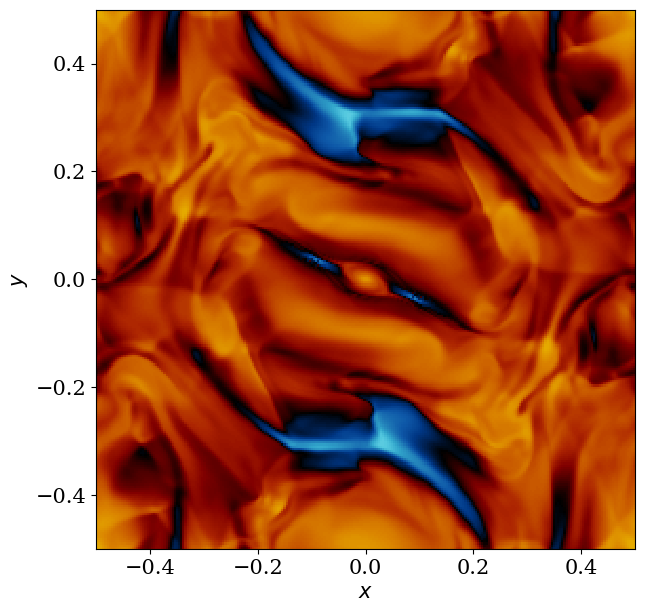

In [17]:
# import a custom script for reading and plotting the hdf5 outputs, placing images in the output_images directory
from plot_output import plot_output
plot_output()



View these images in the `output_images` directory.
For example, here are images `03`, `23`, `43`, and `83`

- Image 3

    ![Image 3](./output_images/img00003.png)

- Image 43

    ![Image 43](./output_images/img00083.png)
    
- Image 43

    ![Image 43](./output_images/img00043.png)
    
    
- Image 83

    ![Image 83](./output_images/img00083.png)
    
### Turn the images into a video

The plot_output function from the preceding step also generates a movie from all the output images.
Here is a 2D simulation of the Orszag-Tang Vortex:



In [18]:
from IPython.display import Video
Video("density.mov")